### Análisis y Procesamiento de Señales - 2do Cuatrimestre 2025
# **Tarea Semanal 5**: *Estimación Espectral: Ancho de Banda de Señales Reales*
#### Mora Taranilla y Victoria Jazmín Salgado

## **Resumen**:
El objetivo de esta Tarea Semanal fue realizar la estimación de la densidad espectral de potencia (PSD) de señales reales.  A partir de ésto, se estima asimismo el ancho de banda de cada señal. 

## **Introducción Teórica**
En este trabajo y a diferencia de los anteriores, se comienza a tratar con señales reales, que son de naturaleza estocástica. 
Debido a esto, es necesario realizar una estimación de la Densidad Espectral de Potencia (PSD por sus siglas en inglés). 
Para poder calcular directamente la PSD, sería necesario contar con infinitas muestras de la señal o infinitas realizaciones, para obtener "la imagen completa" del fenómeno aleatorio. Como esto es imposible en la práctica, se estima el espectro de potencia de la señal, donde puede observarse la distribución de la potencia de la misma en las diferentes frecuencias que la componen. 
Para llevar esta tarea a cabo existen diferentes métodos. Algunos de ellos trabajan sobre la mejora de la varianza del periodograma, mientras que otros trabajan sobre la mejora de la secuencia de autocorrelación de la señal, como el método de Blackman-Tukey. En este caso se trabajará con el Método de Welch, que pertenece al primer grupo, apuntando a disminuir la varianza del Periodograma. 

El periodograma puede definirse como un estimador de la Densidad Espectral de Potencia de la siguiente manera: 

$$
\hat{S}_{XX}(k, N) = \frac{1}{N}|X[k]|^2
$$

Para que un estimador sea deseable, se busca que sea consistente: es decir que sea asintóticamente insesgado y que su varianza tienda a cero al aumentar la cantidad de muestras. El problema con el uso directo del periodograma como estimador, es que por su naturaleza no presenta una disminución de la varianza con la cantidad de muestras. Por este motivo, surge el método de Welch.

Éste método no paramétrico (ya que no depende de contar con información sobre la señal analizada), comienza por separar la señal aleatoria en L segmentos de longitud M, que se superponen en D puntos.  

Luego, para cada uno de estos segmentos, se aplica una ventana en el dominio del tiempo, para luego calcular su periodograma como fue descrito previamente. Finalmente, se promediarán todos estos estimadores calculados, obteniendo finalmente el estimador de la densidad espectral de potencia. 

Al realizar un promedio de variables no correladas, la varianza tenderá a cero, lo que convierte al periodograma computado por el método de Welch en un estimador consistente de la PSD. Sin embargo, como resultado de la utilización de ventanas que no son la rectangular, se tendrá una resolución espectral menor que en el periodograma. Existe una relación de compromiso entre resolución espectral y varianza.

Se elige el método de Welch frente a, por ejemplo, Blackman-Tukey, debido a las diferencias que presentan en el método de estimación, como se indicó anteriormente. El problema de Blackman-Tukey para las señales de este trabajo es que asume que la señal es estacionaria en todo su conjunto, ya que calcula una sola secuencia de autocorrelación; en este trabajo se trata con señales no estacionarias. 

En cambio, el método de Welch asume que la señal es estacionaria sólo dentro de cada uno de los segmentos en los que se divide a la misma. Al promediar los espectros de todos los segmentos, se obtiene una estimación más robusta del contenido frecuencial promedio de una señal que varía en el tiempo.  

Además, el método de Welch presenta ventajas computacionales significativas frente a B-T ya que se basa en el cálculo de múltiples FFT, en lugar de una estimación de autocorrelación completa. Ésto último puede ser costoso computacionalmente para señales de mayor longitud (lo que puede ser el caso para señales reales). 

Por otro lado, aparece el concepto de Ancho de Banda de una señal.
Puede definirse al ancho de banda como la porción del espectro de frecuencias donde la señal entrega un porcentaje deseado de su potencia total. Se define de esta forma debido a que las señales reales presentan un piso de ruido y la energía se distribuye a lo largo del espectro. En base al espectro final se define el porcentaje; generalmente este número está alrededor del 99% si la señal no presenta mucho ruido. Es decir, a partir de ciertas frecuencias, se encuentran solo aquellas que entregan $\approx$1% de la potencia total, por lo que no se consideran dentro del ancho de banda.

## **Desarrollo y Análisis**

Se cuenta con cinco señales reales de tipos diferentes:
- Electrocardiograma (ECG)
- Pletismografía (PPG)
- Audios

A partir de ellas, se busca:
- Realizar la estimación de la Densidad Espectral de Potencia (PSD) de cada señal
- Realizar una estimación del ancho de banda de cada señal y presentar los resultados en una tabla

Luego, se debe proponer algún otro tipo de señal que no haya sido analizada para repetir el anális, explicando su origen y cómo fue digitalizada.

### **ECG sin ruido**
En un principio, se realizó el análisis de un Electrocardiograma. Se comienza por importar las librerías necesarias y leer la señal de ECG. Para realizar la estimación del periodograma fue utilizado el método Welch, como fue mencionado anteriormente. 

In [3]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.io.wavfile import write

In [4]:
#ECG
fs_ecg = 1000 # Hz

# Cargo la señal
ecg_one_lead = np.load('ecg_sin_ruido.npy')
#.shape devuelve tuplas
N_ecg = ecg_one_lead.shape[0] #solo el elemento 0

# Parámetros de Welch
cant_promedios = 30
nperseg = N_ecg // cant_promedios
nfft = 3 * nperseg
win = "hamming"

En base a los parámetros definidos, se implementa el método a través de la función de *scipy.signal* **welch**. Estos parámetros fueron definidos luego de estudiar el comportamiento del espectro al aumentar y disminuír la cantidad de promedios que se utilizaban. Una vez definido el punto en el cual se mantenían los picos característicos del espectro, se eligió la ventana a utilizar, en este caso la ventana hamming. Por ultimo, fue definido el parámetro de la fft para suavizar el gráfico. 

La función retorna un eje de frecuencias y el periodograma, con una longitud por defecto hasta Nyquist ($fs/2$). De manera predeterminada, realiza los promedios con la función '*mean*' y realiza una superposición de los segmentos en un $50\%$.

A continuación, se grafica la densidad espectral de potencia obtenida junto con la señal original. 

In [5]:
f, Pxx = sig.welch(ecg_one_lead, fs=fs_ecg, window = win, nperseg=nperseg, nfft=nfft)

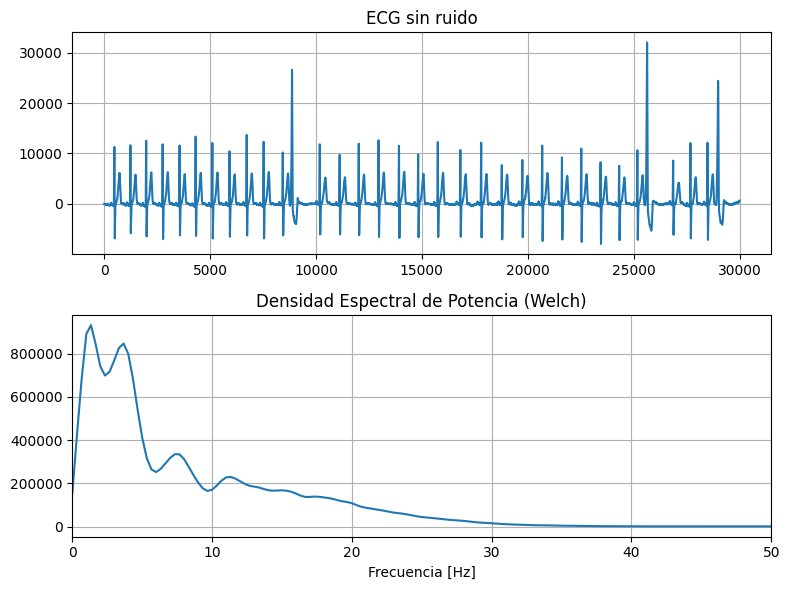

In [6]:
#Gráfico de la PSD - normal
plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.title("ECG sin ruido")
plt.grid(True)
plt.plot(ecg_one_lead)

plt.subplot(2,1,2)
plt.plot(f, Pxx)
plt.title("Densidad Espectral de Potencia (Welch)")
plt.xlabel("Frecuencia [Hz]")
plt.grid(True)
plt.xlim([0, 50]) #como es pasabajos, limito
plt.tight_layout()
plt.show()

En base al gráfico, se puede observar que la señal es de tipo pasabajo, lo cual implica que su Densidad Espectral de Potencia (DSP) se concentra en las frecuencias bajas. 

Se realiza ahora la estimación del ancho de banda. Para llevarlo a cabo, fue utilizada la función de la librería *numpy* **cumsum** sobre el Espectro de Potencias. Ésta toma un array y devuelve otro de la misma longitud, donde cada elemento representa la suma de todos los valores anteriores, incluido el actual. Este vector fue normalizado, al dividirlo por la potencia total acumulada, es decir, el último elemento del mismo array. De esta forma, se trabajó sobre el porcentaje de la potencia total.

Al observar que el espectro no contiene demasiado ruido, fue utilizado un porcentaje del $99\%$ para la determinación del ancho de banda, asignando un porcentaje del $1\%$ de la potencia al ruido.

In [7]:
#ANCHO DE BANDA ECG
porcentaje = 0.99

pot_acum = np.cumsum(Pxx)
pot_acum_norm = pot_acum / pot_acum[-1]  # normalizo

# Encuentro el índice donde la potencia supera el 99%
index_bw = np.where(pot_acum_norm >= porcentaje)[0][0]

#np.where devuelve tupla de arrays, uno por cada dimensión.
#Primer [0] → extrae el array de índices de la tupla que devuelve np.where.
#Segundo [0] → toma el primer elemento de ese array.

# Frecuencia correspondiente
freq_bw = f[index_bw]
print(f"Ancho de banda - Señal ECG:", freq_bw)

Ancho de banda - Señal ECG: 30.666666666666664


El valor obtenido a partir de este procedimiento resulta consistente con lo observado, dado que en el gráfico se aprecia que, a partir de los $30 Hz$, la densidad espectral de potencia adquiere valores despreciables en relación con los picos principales del espectro.

### **PPG**
Para esta señal fue realizado el mismo procedimiento. Los parámetros del método Welch fueron definidos mediante el análisis del comportamiento del espectro. 

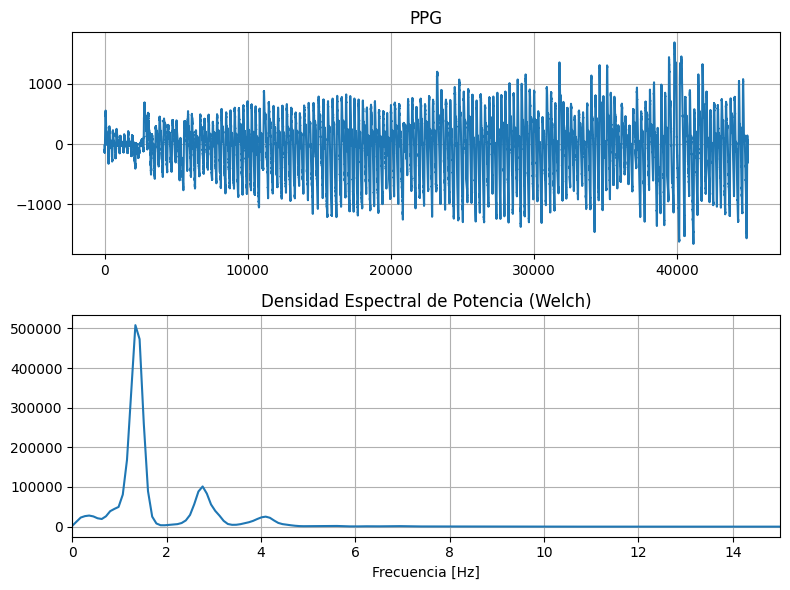

In [8]:
fs_ppg = 400 # Hz
ppg = np.load('ppg_sin_ruido.npy')

N_ppg = ppg.shape[0] 

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.title("PPG")
plt.grid(True)
plt.plot(ppg)

#PARAMETROS WELCH

cant_promedios_ppg = 20 
nperseg_ppg = N_ppg // cant_promedios_ppg
nfft_ppg = 2 * nperseg_ppg
win_ppg = "hamming"

f_ppg, Pxx_ppg = sig.welch(ppg, fs=fs_ppg, window = win_ppg, nperseg=nperseg_ppg, nfft=nfft_ppg)

#Gráfico de la PSD - PPG
plt.subplot(2,1,2)
plt.plot(f_ppg, Pxx_ppg)
plt.title("Densidad Espectral de Potencia (Welch)")
plt.xlabel("Frecuencia [Hz]")
plt.grid(True)
plt.tight_layout()
plt.xlim([0, 15]) #como es pasabajos, limito
plt.show()

Se puede observar nuevamente que se trata con una señal pasabajo, esta vez con frecuencias menores. Ésto se debe a la fuente de la señal. Las frecuencias en una fotopletismografía (PPG) se relacionan de manera directa con la frecuencia cardíaca. De esta forma, se observa al rededor de $1.3 Hz$ el pico máximo, mostrando una frecuencia cardíaca aproximada de 78 latidos por minuto. 

Como es una señal pasabajo, se realizó el cálculo del límite superior para el ancho de banda. Nuevamente, al tratar con un espectro que no presenta ruido considerable, fue adjudicado un $99\%$ de la potencia total a la señal y un $1\%$ al ruido.

In [9]:
#ANCHO DE BANDA PPG
porcentaje_ppg = 0.99

pot_acum_ppg = np.cumsum(Pxx_ppg)
pot_acum_norm_ppg = pot_acum_ppg / pot_acum_ppg[-1]  

index_bw_ppg = np.where(pot_acum_norm_ppg >= porcentaje_ppg)[0][0]

freq_bw_ppg = f_ppg[index_bw_ppg]
print(f"Ancho de banda - Señal PPG: {freq_bw_ppg:.2f}")

Ancho de banda - Señal PPG: 5.43


Nuevamente, se puede observar un resultado consistente con el gráfico de la Densidad Espectral de Potencia. 

### **Señales de Audio**
En este apartado se encuentra el mismo análisis para las señales de audio proporcionadas. Estas señales corresponden a:

- Un silbido.
- La canción de la cucaracha silbada.
- Un audio hablado.

A continuación, se realizan las estimaciones de PSD y el cálculo de los anchos de banda.

#### Silbido
Los silbidos abarcan un gran rango de frecuencias, entre las cuales se encuentran las frecuencias percetibles por el oído humano ($20 Hz$ a $20 kHz$). El audio utilizado realiza un barrido de frecuencias, ya que es un silbido que oscila entre un silbido grave y uno agudo.

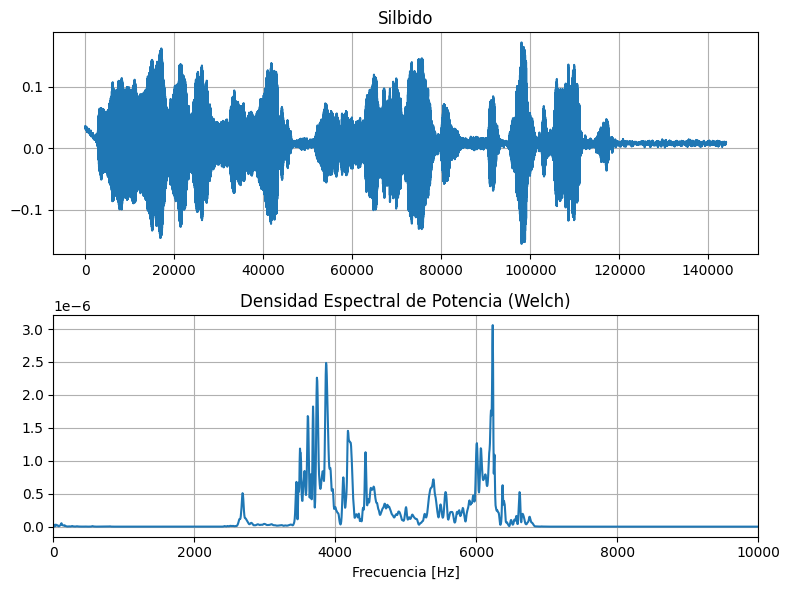

In [10]:
# Silbido
fs_silbido, wav_data_silbido = sio.wavfile.read('silbido.wav')

N_silbido = wav_data_silbido.shape[0] 

plt.figure(figsize=(8, 6))
plt.subplot(2,1,1)
plt.title("Silbido")
plt.grid(True)
plt.plot(wav_data_silbido)

#PARAMETROS WELCH
cant_promedios_silbido = 30 
nperseg_silbido = N_silbido // cant_promedios_silbido
nfft_silbido = 2 * nperseg_silbido
win_silbido = "hamming"

f_silbido, Pxx_silbido = sig.welch(wav_data_silbido, fs=fs_silbido, window = win_silbido, nperseg=nperseg_silbido, nfft=nfft_silbido)

#Gráfico de la PSD
plt.subplot(2,1,2)
plt.plot(f_silbido, Pxx_silbido)
plt.title("Densidad Espectral de Potencia (Welch)")
plt.xlabel("Frecuencia [Hz]")
plt.grid(True)
plt.xlim((0,10000))

plt.tight_layout()
plt.show()

Como era de esperarse, este espectro se compone de frecuencias más altas. Además, se observa, a diferencia de los espectros anteriores, que se trata de un pasa banda, es decir que tiende a cero hacia el comienzo y hacia el final del espectro. De esta forma, para calcular el ancho de banda fueron utilizadas dos cotas, una inferior y otra superior.

Se utilizó nuevamente un porcentaje de $99\%$, pero esta vez, dejando el $1\%$ del ruido dividido en dos partes: $0.5\%$ a cada lado.

In [11]:
## Ancho de banda del silbido
pot_acum_silbido = np.cumsum(Pxx_silbido)
pot_acum_norm_silbido = pot_acum_silbido / pot_acum_silbido[-1]  

porcentaje_silbido = 0.99
cota_inferior_silbido = 0.005

index_inf_bw_silbido = np.where(pot_acum_norm_silbido >= cota_inferior_silbido)[0][0]
index_bw_silbido = np.where(pot_acum_norm_silbido >= porcentaje_silbido + cota_inferior_silbido)[0][0]

# Frecuencia correspondiente
freq_inf_bw_silbido = f_silbido[index_inf_bw_silbido]
freq_bw_silbido = f_silbido[index_bw_silbido]
print(f"Frecuencia correspondiente a la Cota Inferior  - Ancho de Banda Silbido: {freq_inf_bw_silbido:.2f}")
print(f"Frecuencia correspondiente a la Cota Superior - Ancho de Banda Silbido: {freq_bw_silbido:.2f}")

Frecuencia correspondiente a la Cota Inferior  - Ancho de Banda Silbido: 2630.00
Frecuencia correspondiente a la Cota Superior - Ancho de Banda Silbido: 6740.00


#### La Cucaracha
Como segunda señal de audio, se utilizó la canción la melodía de la canción infantil "*La cucaracha*" realizada por silbidos. Se llevó a cabo el mismo procedimiento.

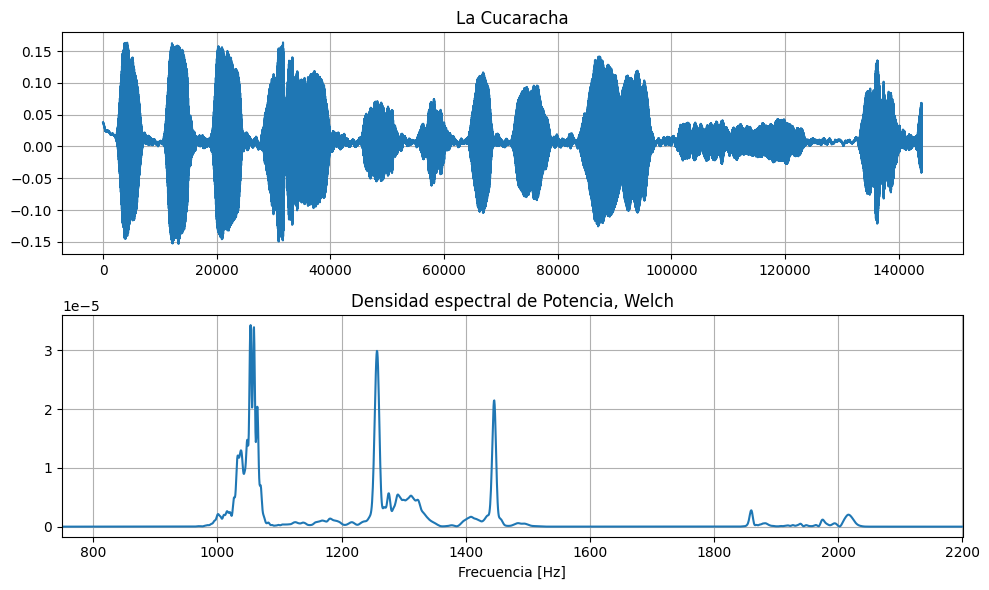

Frecuencia correspondiente a la Cota Inferior  - Ancho de Banda 'La cucaracha': 984.60
Frecuencia correspondiente a la Cota Superior - Ancho de Banda 'La cucaracha': 2022.60


In [12]:
fs_cucaracha, wav_data_cucaracha = sio.wavfile.read('la cucaracha.wav')

N_cucaracha = wav_data_cucaracha.shape[0] 

# PSD Welch
cant_promedios_cucaracha = 9 
nperseg_cucaracha = N_cucaracha // cant_promedios_cucaracha
nfft_cucaracha = 5 * nperseg_cucaracha
win_cucaracha = "hamming"

f_cucaracha, Pxx_cucaracha = sig.welch(wav_data_cucaracha, fs=fs_cucaracha, window = win_cucaracha, nperseg=nperseg_cucaracha, nfft=nfft_cucaracha)

# Grafico
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(wav_data_cucaracha)
plt.title('La Cucaracha')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(f_cucaracha, Pxx_cucaracha)
plt.title('Densidad espectral de Potencia, Welch')
plt.xlabel('Frecuencia [Hz]')
plt.xlim((750,2200))
plt.grid(True)

plt.tight_layout()
plt.show()

# Ancho de banda
# Defino el porcentaje en base al ruido que observo
porcentaje_cucaracha = 0.99
porcentaje_inf = 0.005

pot_acum_cucaracha = np.cumsum(Pxx_cucaracha)
pot_acum_norm_cucaracha = pot_acum_cucaracha / pot_acum_cucaracha[-1] #Vector con valores de 0 a 1

# En el gráfico se observa que es pasa banda, por eso definimos limite inferior y superior
index_inf_cucaracha = np.where(pot_acum_norm_cucaracha >= porcentaje_inf)[0][0]
index_sup_cucaracha = np.where(pot_acum_norm_cucaracha >= porcentaje_cucaracha + porcentaje_inf)[0][0]

freq_inf_bw_cucaracha = f_cucaracha[index_inf_cucaracha]
freq_sup_bw_cucaracha = f_cucaracha[index_sup_cucaracha]

print(f"Frecuencia correspondiente a la Cota Inferior  - Ancho de Banda 'La cucaracha': {freq_inf_bw_cucaracha:.2f}")
print(f"Frecuencia correspondiente a la Cota Superior - Ancho de Banda 'La cucaracha': {freq_sup_bw_cucaracha:.2f}")

#### Audio Hablado
En el archivo .wav se escucha una voz masculina hablando. Para este caso, fue utilizado un porcentaje sobre la potencia total de $98\%$.

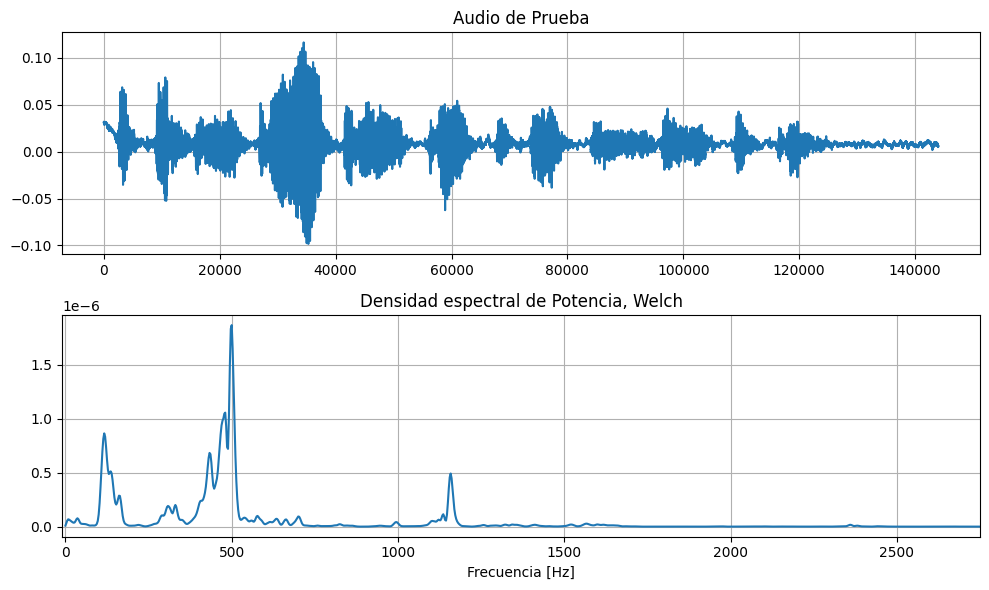

Frecuencia correspondiente a la Cota Superior - Ancho de Banda Audio: 1630.56


In [13]:
fs_audio, wav_data = sio.wavfile.read('prueba psd.wav')
N_audio = wav_data.shape[0] 

# Estimación de PSD
cant_promedios_audio = 25
nperseg_audio = N_audio // cant_promedios_audio
nfft_audio = 3 * nperseg_audio
win_audio = "hamming"

f_audio, Pxx_audio = sig.welch(wav_data, fs=fs_audio, window = win_audio, nperseg=nperseg_audio, nfft=nfft_audio)

# Grafico
plt.figure(figsize=(10,6))

plt.subplot(2,1,1)
plt.plot(wav_data)
plt.title('Audio de Prueba')
plt.grid(True)

plt.subplot(2,1,2)
plt.plot(f_audio, Pxx_audio)
plt.title('Densidad espectral de Potencia, Welch')
plt.xlabel('Frecuencia [Hz]')
plt.xlim((-10,2750))
plt.grid(True)

plt.tight_layout()
plt.show()

# Ancho de banda
# Defino el porcentaje en base al ruido que observo
porcentaje_audio = 0.98

pot_acum_audio = np.cumsum(Pxx_audio)
pot_acum_norm_audio = pot_acum_audio / pot_acum_audio[-1] #Vector con valores de 0 a 1

# En el gráfico se observa que es pasa bajo, por eso definimos limite superior
index_sup_audio = np.where(pot_acum_norm_audio >= porcentaje_audio)[0][0]

freq_sup_bw_audio = f_audio[index_sup_audio]

print(f"Frecuencia correspondiente a la Cota Superior - Ancho de Banda Audio: {freq_sup_bw_audio:.2f}")

De esta manera se obtuvieron los DSP de las tres señales. 
Cabe destacar que la elección de los parámetros de Welch se hace de manera empírica; no existe una regla general que determine cuántos promedios se debe utilizar. De todas maneras, se observa que a menor cantidad de promedios se obtiene una PSD con una varianza notable, en cambio al aumentar éste numero la varianza disminuye. Sin embargo, no debe elegirse un número de promedios demasiado grande ya que existe el riesgo de perder información valiosa sobre la señal si la DSP estuviera demasiado suavizada.

A continuación, se presentan los valores finales obtenidos para el ancho de banda de los espectros estudiados.

In [17]:
import pandas as pd

senales = ["ECG", "PPG", "Silbido", "Cucaracha", "Audio"]

clasificacion = ["Pasa Bajo","Pasa Bajo","Pasa Banda","Pasa Banda","Pasa Bajo"]
cota_inf = [0, 0, freq_inf_bw_silbido, freq_inf_bw_cucaracha, 0]
cota_sup = [freq_bw, freq_bw_ppg, freq_bw_silbido, freq_sup_bw_cucaracha, freq_sup_bw_audio]
ancho_banda = [freq_bw-0, freq_bw_ppg-0, freq_bw_silbido-freq_inf_bw_silbido, freq_sup_bw_cucaracha-freq_inf_bw_cucaracha, freq_sup_bw_audio-0]

df_10dB = pd.DataFrame({
    "Señales": senales,
    "Clasificación": clasificacion,
    "Cota Inferior [Hz]": cota_inf,
    "Cota Superior [Hz]": cota_sup,
    "Ancho de Banda [Hz]": ancho_banda
})
df_10dB_styled = df_10dB.style.set_caption("Estimación de Ancho de Banda").hide(axis="index").format(precision=2)

df_10dB_styled

Señales,Clasificación,Cota Inferior [Hz],Cota Superior [Hz],Ancho de Banda [Hz]
ECG,Pasa Bajo,0.00,30.67,30.67
PPG,Pasa Bajo,0.00,5.43,5.43
Silbido,Pasa Banda,2630.00,6740.00,4110.00
Cucaracha,Pasa Banda,984.60,2022.60,1038.00
Audio,Pasa Bajo,0.00,1630.56,1630.56


## **Bonus**:
Proponer algún tipo de señal que no haya sido analizada y repetir el análisis. Explicar su origen y cómo fue digitalizada.

La obtención de la Densidad Espectral de Potencia (PSD) tiene múltiples aplicaciones prácticas interesantes, y una de ellas es la astronomía. Un uso particular es el análisis de la curva de luz de una estrella.

Una curva de luz es un gráfico que muestra la intensidad lumínica de un objeto o región celestial como función del tiempo. Lo interesante, para este trabajo, es que la PSD permite identificar patrones repetitivos en la señal de brillo de la estrella, reflejando las frecuencias a las que ocurren estos eventos. La PSD ilustra tanto estas frecuencias como la energía asociada a cada una, de manera que los picos representan fenómenos que se repiten con mayor frecuencia y que son de interés. Estos fenómenos pueden incluir, por ejemplo, manchas estelares o el cruce de un planeta frente a la estrella, pero también se observa ruido en la señal, por lo que el análisis gráfico resulta muy útil.

El telescopio espacial Kepler, lanzado en 2009, tenía como objetivo medir el brillo de las estrellas. Fue diseñado para observar de manera continua unas 150.000 estrellas en una franja del cielo correspondiente a la constelación del Cisne. Kepler detectó planetas que orbitan alrededor de estas estrellas observando tránsitos, pequeñas caídas en el brillo estelar que ocurren cuando un planeta pasa frente a su estrella.

Para analizar la PSD de la estrella Kepler-10 se utilizó la librería de Python lightkurve, que permite acceder de manera sencilla a este tipo de datos. Cada curva de luz es un arreglo de números discretos que representa el brillo digitalizado de la estrella. 

/home/victoria24/victorias/lib/python3.10/site-packages/lightkurve/prf/__init__.py:7: UserWarning: Warning: the tpfmodel submodule is not available without oktopus installed, which requires a current version of autograd. See #1452 for details.
  warnings.warn(
/tmp/ipykernel_5668/15495043.py:7: LightkurveDeprecationWarning: The search_lightcurvefile function is deprecated and may be removed in a future version.
        Use search_lightcurve() instead.
  lc_file = search_lightcurvefile("Kepler-10", mission="Kepler").download()
/home/victoria24/victorias/lib/python3.10/site-packages/lightkurve/search.py:420: LightkurveWarning: Warning: 50 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(
/tmp/ipykernel_5668/15495043.py:8: LightkurveDeprecationWarning: The PDCSAP_FLUX function is deprecated and may be removed in a future version.
  lc = 

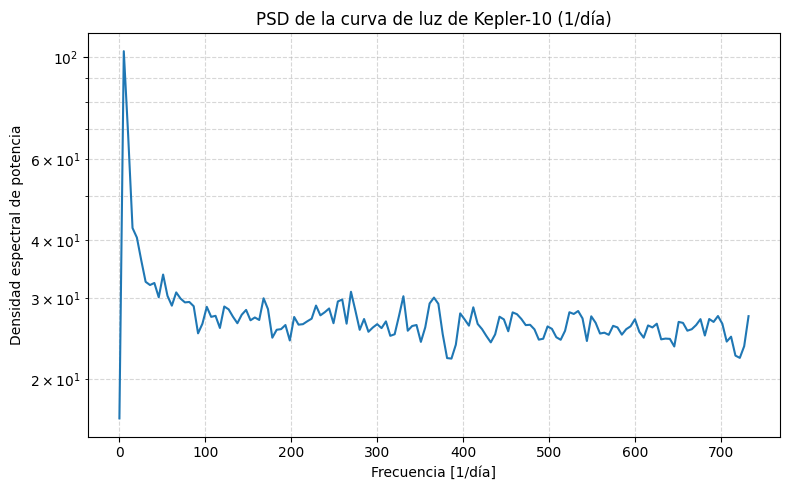

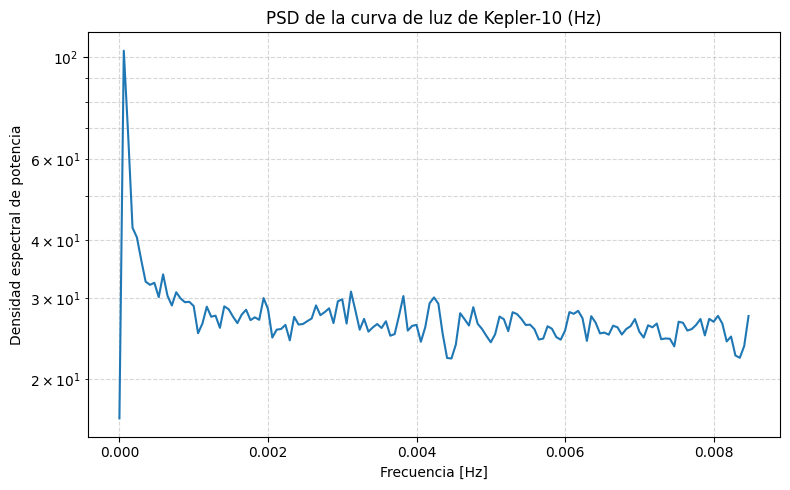

In [15]:
from lightkurve import search_lightcurvefile
from scipy.signal import welch
import matplotlib.pyplot as plt
import numpy as np

# Descargar la curva de luz
lc_file = search_lightcurvefile("Kepler-10", mission="Kepler").download()
lc = lc_file.PDCSAP_FLUX.remove_nans()
t, flux = lc.time.value, lc.flux.value

# Frecuencia de muestreo en 1/día
fs_days = 1 / np.median(np.diff(t))

# Configuración de Welch 
cant_promedios = 150  
nperseg = len(flux) // cant_promedios
nfft = 1 * nperseg
window = "hamming"

# Calcular PSD
f_days, Pxx = welch(flux, fs=fs_days, window=window, nperseg=nperseg, nfft=nfft)

# GPSD en 1/día 
fig1, ax1 = plt.subplots(figsize=(8,5))
ax1.semilogy(f_days, Pxx)
ax1.set_xlabel("Frecuencia [1/día]")
ax1.set_ylabel("Densidad espectral de potencia")
ax1.set_title("PSD de la curva de luz de Kepler-10 (1/día)")
ax1.grid(True, which="both", ls="--", alpha=0.5)
fig1.tight_layout()

# Guardar la figura
#fig1.savefig("psd_kepler10_dia.png", dpi=300, bbox_inches='tight')

plt.show()

# PSD en Hz 
# Convertir frecuencia a Hz
f_Hz = f_days / 86400  # 1 día = 86400 s

fig2, ax2 = plt.subplots(figsize=(8,5))
ax2.semilogy(f_Hz, Pxx)
ax2.set_xlabel("Frecuencia [Hz]")
ax2.set_ylabel("Densidad espectral de potencia")
ax2.set_title("PSD de la curva de luz de Kepler-10 (Hz)")
ax2.grid(True, which="both", ls="--", alpha=0.5)
fig2.tight_layout()

# Guardar la figura
#fig2.savefig("psd_kepler10_Hz.png", dpi=300, bbox_inches='tight')

plt.show()

Observación: para poder correr el código anterior, es necesario tener descargada la librería "lightkurve" de Python. Para que no sea necesario hacerlo, se adjuntan a continuación como imagen los gráficos obtenidos para su posterior análisis. 

![PSD de Kepler-10 (1/día)](psd_kepler10_dia.png)
![PSD de Kepler-10 (Hz)](psd_kepler10_Hz.png)

Se graficó con el eje de frecuencia tanto en en [Hz] como en [1/dia]. 

Al observar los gráficos de la PSD, se identifica un pico destacado a bajas frecuencias, indicador la presencia de un fenómeno que se repite de manera significativa en el tiempo. Ésto podría sugerir la presencia de un fenómeno de variación lenta, posiblemente asociado a un proceso externo o independiente de la rotación de la estrella. Dado que se diferencia claramente del resto de las componentes de frecuencia, podría vincularse a un evento periódico distinto. No se profundizará en su origen, ya que no es el objetivo de este trabajo, pero resulta un hallazgo interesante que ilustra cómo la PSD permite detectar patrones repetitivos en la señal: los picos correspondientes a los mismos tendrán mayor amplitud. 

Al igual que en otras señales, el número de promedios elegido busca disminuir la varianza de la estimación sin perder información importante de la señal. En este caso, fue necesario un número considerablemente mayor de promedios que en el resto de señales analizadas, posiblemente debido a la longitud y naturaleza de la señal estudiada. 

Finalmente, se considera que en este caso no resulta de interés calcular el ancho de banda de la señal, ya que presenta variaciones de amplitud considerables en todo el rango de frecuencias graficado. 

## **Conclusión**

En este trabajo se logró estimar la Densidad Espectral de Potencia de diversas señales con distintas naturalezas. Esto permitió además observar a partir de sus gráficos, el ancho de banda aproximado de cada señal, corroborándolo posteriormente de manera numérica. Los resultados obtenidos fueron consistentes con lo esperado, considerando la naturaleza de las señales reales analizadas.

## **Autoevaluación del Aprendizaje**

**Indicar una opción**:
*Resolvimos la tarea sin dudas*

**Responder**:

*¿Qué aprendiste al hacer esta tarea? ¿Qué te quedó claro? ¿Qué te sigue costando?*
Aprendimos sobre estimadores de la DSP y pudimos ver cómo el ancho de banda se hace evidente a partir del gráfico de la misma, también logrando entender mejor por qué éste último se determina como un porcentaje de la potencia total de la señal. Además logramos observar cómo los parámetros del método Welch interfieren en la estimación de la DSP y la importancia de estudiar los comportamientos, para no perder información valiosa.

*Indicar si se utilizó IA*:

Sí, usamos chatGPT y Gemini para terminar de comprender conceptos teóricos.